In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

import mglearn
from dashboard_one import *

In [2]:
df = pd.read_csv('main_file.csv').iloc[:,1:]
com_col = ['Phase','RID','VISCODE']
df

C:\Users\weipi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,...,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,DX_bl
0,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,NaN,...,0.0,1.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,CN
1,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,7.0,7.0,9.0,10.0,11.0,CN
2,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,5.0,9.0,9.0,9.0,8.0,CN
3,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,0.0,2.0,1.0,15.0,6.0,6.0,6.0,8.0,8.0,CN
4,2,0.0,0.0,1.0,1.0,Male,Not Hisp/Latino,White,74.3,011_S_0002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27115,7102,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,341_S_7102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27116,7103,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,013_S_7103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27117,7104,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,153_S_7104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27118,7105,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,035_S_7105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['PTAU'].dropna()

27       22.83
29       24.18
33       13.29
35        13.3
40       33.43
         ...  
23350    53.65
23363    36.39
23365    40.95
23391     8.53
23397     20.9
Name: PTAU, Length: 2369, dtype: object

In [4]:
npi=pd.read_csv('npi_short.csv').iloc[:,1:]
npi

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,NaN
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,NaN
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,NaN
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,ADNI3,6449,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2661,ADNI3,6516,y3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2662,ADNI3,6654,y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2663,ADNI3,6820,y2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [5]:
npi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Phase    2665 non-null   object 
 1   RID      2665 non-null   int64  
 2   VISCODE  2665 non-null   object 
 3   NPIK1    1326 non-null   float64
 4   NPIK2    1325 non-null   float64
 5   NPIK3    1323 non-null   float64
 6   NPIK4    1322 non-null   float64
 7   NPIK5    1323 non-null   float64
 8   NPIK6    1325 non-null   float64
 9   NPIK7    1325 non-null   float64
 10  NPIK8    1318 non-null   float64
 11  NPIK9A   1326 non-null   float64
 12  NPIK9B   1327 non-null   float64
 13  NPIK9C   1326 non-null   float64
 14  NPIKTOT  1325 non-null   float64
 15  NPIKSEV  1276 non-null   float64
dtypes: float64(13), int64(1), object(2)
memory usage: 333.2+ KB


In [6]:
npi.describe()

,RID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV
count,2665.000000,1326.000000,1325.000000,1323.000000,1322.000000,1323.000000,1325.000000,1325.000000,1318.000000,1326.000000,1327.000000,1326.000000,1325.000000,1276.000000
mean,2798.812008,0.441176,0.541132,0.057445,0.223903,0.046107,0.218113,0.290566,0.125948,2.665913,1.360211,1.150830,3.822642,1.438871
std,2137.923372,0.496715,0.498493,0.232779,0.417016,0.209797,0.413121,0.454195,0.331917,1.026810,0.585019,1.206221,2.622140,0.616271
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,802.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000
50%,2201.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000
75%,4638.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,4.000000,2.000000
max,7100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,12.000000,3.000000


In [7]:
sleep = npi.merge(df[com_col + ['OSA','insomnia']],how='outer',on=com_col).dropna(axis=1, how='all')
sleep

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,OSA,insomnia
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,NaN,0.0,1.0
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,NaN,0.0,1.0
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,0.0,1.0
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,NaN,0.0,1.0
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27115,ADNI3,7102,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27116,ADNI3,7103,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27117,ADNI3,7104,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
27118,ADNI3,7105,sc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [8]:
abeta_insom = df[com_col + ['ABETA']].dropna(subset=['ABETA'])  # drop rows where abeta not available
tau_insom = df[com_col + ['TAU']].dropna(subset=['TAU'])
ptau_insom = df[com_col + ['PTAU']].dropna(subset=['PTAU'])

left merge 'sleep' table to biomarker table. As it doesn't not make sense to use the datapoint where biomarker not available.

In [9]:
abeta_insom_npi = abeta_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all') # drop the columns where all are na
tau_insom_npi = tau_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all')
ptau_insom_npi = ptau_insom.merge(sleep, how='left', on=com_col).dropna(axis=1, how='all')

all NPIK questions and total score are not available for biomarkers. In the sleep data, only the 'insomnia','npiksev','OSA' are available for abeta,tau,ptau analysis

In [10]:
abeta_insom_npi.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 2621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2622 non-null   object 
 1   RID       2622 non-null   int64  
 2   VISCODE   2318 non-null   object 
 3   ABETA     2622 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2622 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.9+ KB


In [11]:
tau_insom_npi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 2621
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2622 non-null   object 
 1   RID       2622 non-null   int64  
 2   VISCODE   2318 non-null   object 
 3   TAU       2622 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2622 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.9+ KB


In [12]:
ptau_insom_npi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2621 entries, 0 to 2620
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Phase     2621 non-null   object 
 1   RID       2621 non-null   int64  
 2   VISCODE   2317 non-null   object 
 3   PTAU      2621 non-null   object 
 4   NPIKSEV   183 non-null    float64
 5   OSA       2621 non-null   float64
 6   insomnia  1038 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 163.8+ KB


ABETA

In [13]:
#split dataframe into two, one include the TAU value as float, another include TAU value as string, i.e. '>8',...
abeta_num = drop_char_float(abeta_insom_npi,"ABETA")
abeta_str = abeta_insom_npi.drop(abeta_num.index,axis=0) 
print(len(abeta_str) + len(abeta_num) == len(abeta_insom_npi),abeta_num,abeta_str)   #check 

True       Phase   RID VISCODE   ABETA  NPIKSEV  OSA  insomnia
0     ADNI1     3      bl   741.5      NaN  0.0       1.0
1     ADNI1     3     m12   601.4      NaN  0.0       1.0
2     ADNI1     4      bl  1501.0      NaN  0.0       1.0
3     ADNI1     4     m12  1176.0      1.0  0.0       1.0
4     ADNI1     5      bl   547.3      NaN  0.0       1.0
...     ...   ...     ...     ...      ...  ...       ...
2617  ADNI2  5290     m24   815.0      NaN  0.0       NaN
2618  ADNI2  5292      bl   928.3      NaN  0.0       NaN
2619  ADNI2  5292     m24   915.4      NaN  0.0       NaN
2620  ADNI2  5295      bl   416.8      NaN  0.0       NaN
2621  ADNI2  5296      bl  1460.0      NaN  0.0       NaN

[2234 rows x 7 columns]       Phase   RID VISCODE  ABETA  NPIKSEV  OSA  insomnia
6     ADNI1     8      bl  >1700      NaN  0.0       1.0
7     ADNI1     8     m12  >1700      NaN  0.0       1.0
13    ADNI1    19      bl  >1700      NaN  0.0       1.0
14    ADNI1    19     m12  >1700      NaN  0.0

TAU

In [14]:
#split dataframe into two, one include the TAU value as float, another include TAU value as string, i.e. '>8',...
tau_num = drop_char_float(tau_insom_npi,"TAU")
tau_str = tau_insom_npi.drop(tau_num.index,axis=0) 
len(tau_str) + len(tau_num) == len(tau_insom_npi),tau_num,tau_str   #check 

(True,
       Phase   RID VISCODE     TAU  NPIKSEV  OSA  insomnia
 0     ADNI1     3      bl  239.70      NaN  0.0       1.0
 1     ADNI1     3     m12  251.70      NaN  0.0       1.0
 2     ADNI1     4      bl  153.10      NaN  0.0       1.0
 3     ADNI1     4     m12  159.70      1.0  0.0       1.0
 4     ADNI1     5      bl  337.00      NaN  0.0       1.0
 ...     ...   ...     ...     ...      ...  ...       ...
 2617  ADNI2  5290     m24  490.10      NaN  0.0       NaN
 2618  ADNI2  5292      bl  375.70      NaN  0.0       NaN
 2619  ADNI2  5292     m24  394.90      NaN  0.0       NaN
 2620  ADNI2  5295      bl   88.69      NaN  0.0       NaN
 2621  ADNI2  5296      bl  224.90      NaN  0.0       NaN
 
 [2613 rows x 7 columns],
       Phase   RID VISCODE    TAU  NPIKSEV  OSA  insomnia
 667   ADNI1   590      bl  >1300      NaN  0.0       0.0
 776   ADNI1   691      bl    <80      NaN  0.0       1.0
 777   ADNI1   691     m12    <80      NaN  0.0       1.0
 778   ADNI1   692      b

PTAU

In [15]:
#split dataframe into two, one include the PTAU value as float, another include PTAU value as string, i.e. '>8',...
ptau_num = drop_char_float(ptau_insom_npi,"PTAU")
ptau_str = ptau_insom_npi.drop(ptau_num.index,axis=0) 
len(ptau_str) + len(ptau_num) == len(ptau_insom_npi),ptau_num,ptau_str   #check 

(True,
       Phase   RID VISCODE   PTAU  NPIKSEV  OSA  insomnia
 0     ADNI1     3      bl  22.83      NaN  0.0       1.0
 1     ADNI1     3     m12  24.18      NaN  0.0       1.0
 2     ADNI1     4      bl  13.29      NaN  0.0       1.0
 3     ADNI1     4     m12  13.30      1.0  0.0       1.0
 4     ADNI1     5      bl  33.43      NaN  0.0       1.0
 ...     ...   ...     ...    ...      ...  ...       ...
 2616  ADNI2  5290     m24  53.65      NaN  0.0       NaN
 2617  ADNI2  5292      bl  36.39      NaN  0.0       NaN
 2618  ADNI2  5292     m24  40.95      NaN  0.0       NaN
 2619  ADNI2  5295      bl   8.53      NaN  0.0       NaN
 2620  ADNI2  5296      bl  20.90      NaN  0.0       NaN
 
 [2609 rows x 7 columns],
       Phase   RID VISCODE  PTAU  NPIKSEV  OSA  insomnia
 667   ADNI1   590      bl  >120      NaN  0.0       0.0
 776   ADNI1   691      bl    <8      NaN  0.0       1.0
 777   ADNI1   691     m12    <8      NaN  0.0       1.0
 778   ADNI1   692      bl    <8      NaN

<AxesSubplot:xlabel='NPIKSEV', ylabel='PTAU'>

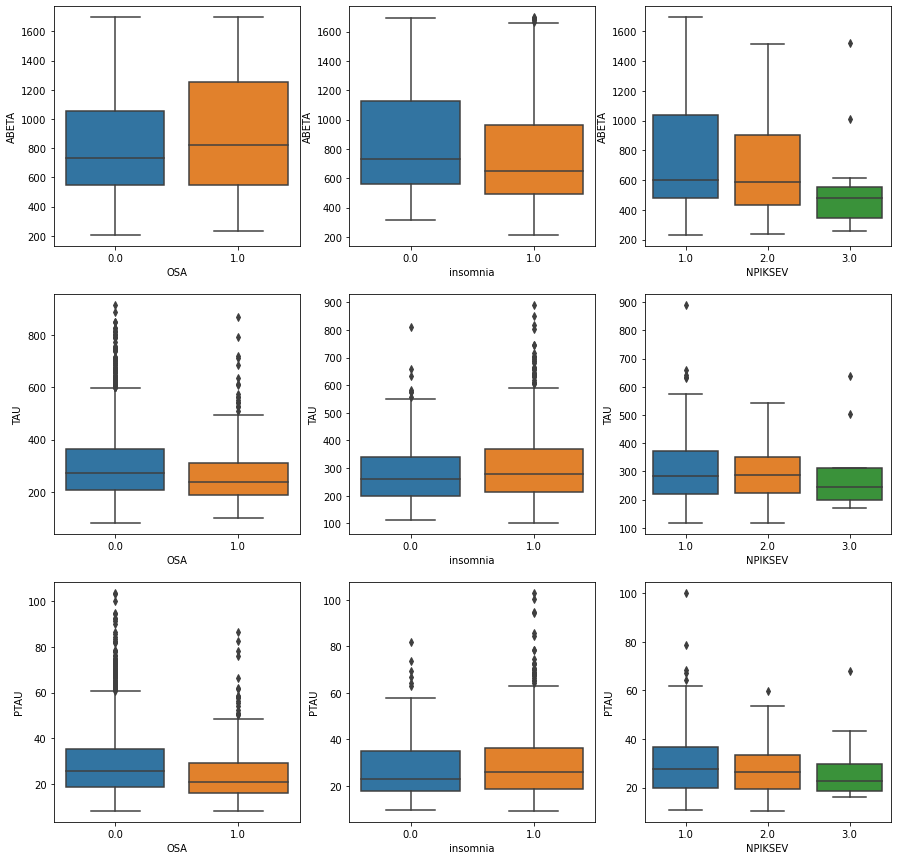

In [16]:
cols = ['OSA','insomnia','NPIKSEV']
f, axes = plt.subplots(3, 3)
f.set_size_inches(15, 15) 
sns.boxplot(y='ABETA', x= cols[0], data=abeta_num, orient='v', ax=axes[0][0])
sns.boxplot(y='ABETA', x= cols[1], data=abeta_num, orient='v', ax=axes[0][1])
sns.boxplot(y='ABETA', x= cols[2], data=abeta_num, orient='v', ax=axes[0][2])
sns.boxplot(y='TAU', x= cols[0], data=tau_num, orient='v', ax=axes[1][0])
sns.boxplot(y='TAU', x= cols[1], data=tau_num, orient='v', ax=axes[1][1])
sns.boxplot(y='TAU', x= cols[2], data=tau_num, orient='v', ax=axes[1][2])
sns.boxplot(y='PTAU', x= cols[0], data=ptau_num, orient='v', ax=axes[2][0])
sns.boxplot(y='PTAU', x= cols[1], data=ptau_num, orient='v', ax=axes[2][1])
sns.boxplot(y='PTAU', x= cols[2], data=ptau_num, orient='v', ax=axes[2][2])

From the plots it is hard to see that OSA, or insomnia, or NPIKSEV parameters have any correlation with the biomarkers.There are a small difference at NPIKSEV vs ABETA, where the NPIKSEV=3 the ABETA value is lower than the other two levels. 

### Try to fit with linear regression

In [17]:
def lin_model(df,target_col,var_cols,method,para_lst):
    '''
    split dataset to training and test groups (4:1),fit linear models by training data and return scores 
    df: dataframe
    target_col: the column which we want to predict
    var_cols: columns we want to use in the model
    method: Ridge, or Lasso, or LogisticRegression...
    para_lst: a list which contains different values of regularization parameter alpha or C
    '''
    train, test = train_test_split(df.dropna(axis=0,how='any'),test_size=0.2)    
    X_train = train[var_cols]
    y_train = train[target_col]
    X_test = test[var_cols]
    y_test = test[target_col]
    
    #print(train.describe())
    #print(test.describe())
    for i in range(len(para_lst)): 
        if method == LogisticRegression:
            model = LogisticRegression(C = para_lst[i]).fit(X_train,y_train) 
        else:            
            model = method(alpha = para_lst[i]).fit(X_train,y_train) # ridge model
        print('parameter: {}, Training set score: {}, Test set score: {}'.format(para_lst[i],model.score(X_train,y_train),model.score(X_test,y_test)))

In [18]:
a = [0.001,0.01,0.1,1,10,100]
lin_model(df=abeta_num,target_col='ABETA',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=abeta_num,target_col='ABETA',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.07441938541724769, Test set score: -0.23641979488082399
parameter: 0.01, Training set score: 0.07441936442407049, Test set score: -0.2362697231593518
parameter: 0.1, Training set score: 0.07441729164891786, Test set score: -0.23478002618283167
parameter: 1, Training set score: 0.0742338114052985, Test set score: -0.22090205785244388
parameter: 10, Training set score: 0.06669310789083005, Test set score: -0.13932446510219232
parameter: 100, Training set score: 0.027812273119774522, Test set score: -0.02817485034978162
parameter: 0.001, Training set score: 0.02260840240712414, Test set score: 0.0285168486619799
parameter: 0.01, Training set score: 0.022608387148449927, Test set score: 0.02849504554464455
parameter: 0.1, Training set score: 0.022606861383768773, Test set score: 0.02827466960100533
parameter: 1, Training set score: 0.02245428594292087, Test set score: 0.025836433136087855
parameter: 10, Training set score: 0.01002950998078711, Test s

In [19]:
lin_model(df=tau_num,target_col='TAU',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=tau_num,target_col='TAU',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.029889942216100862, Test set score: -0.04921782644831074
parameter: 0.01, Training set score: 0.029889937503317587, Test set score: -0.049206665416063
parameter: 0.1, Training set score: 0.029889470763061587, Test set score: -0.04909562533241796
parameter: 1, Training set score: 0.02984697780025647, Test set score: -0.04803756871771814
parameter: 10, Training set score: 0.027800431752526, Test set score: -0.04029556868963158
parameter: 100, Training set score: 0.013485564157525998, Test set score: -0.015569042496976548
parameter: 0.001, Training set score: 0.02787853840959098, Test set score: -0.0027430348890251643
parameter: 0.01, Training set score: 0.027878405620702207, Test set score: -0.0027175024120802416
parameter: 0.1, Training set score: 0.027865123610223308, Test set score: -0.0024681619996529403
parameter: 1, Training set score: 0.026935432332254594, Test set score: -0.00041373332481509095
parameter: 10, Training set score: 0.0, Test s

In [20]:
lin_model(df=ptau_num,target_col='PTAU',var_cols=cols,method=Ridge,para_lst=a)
lin_model(df=ptau_num,target_col='PTAU',var_cols=cols,method=Lasso,para_lst=a)

parameter: 0.001, Training set score: 0.020976504386896244, Test set score: -0.0006301833738142637
parameter: 0.01, Training set score: 0.020976500710886747, Test set score: -0.0006317375883788667
parameter: 0.1, Training set score: 0.020976136525946876, Test set score: -0.0006476141867801655
parameter: 1, Training set score: 0.02094288027532698, Test set score: -0.0008359626269742737
parameter: 10, Training set score: 0.01932877658476173, Test set score: -0.0037310263372214436
parameter: 100, Training set score: 0.008879655350011229, Test set score: -0.016439619838819697
parameter: 0.001, Training set score: 0.02084923603352562, Test set score: 0.02504503127882518
parameter: 0.01, Training set score: 0.020839594740148515, Test set score: 0.02479508680126341
parameter: 0.1, Training set score: 0.02025706344217426, Test set score: 0.023452403450058723
parameter: 1, Training set score: 0.0, Test set score: -0.0017445618020579534
parameter: 10, Training set score: 0.0, Test set score: -0.

Sckit-learn's LinearRegression scores uses 𝑅2 score. A negative 𝑅2 means that the model fitted your data extremely bad.

With both Ridge and Lasso regularization, the linear models fitted the Abeta, Tau, PTau very bad. 

### Sleep vs Diagnosis(MCI, AD, NC)

Quick recap:
- ADNI1: DXCURREN 1=NL; 2=MCI; 3=AD
- ADNIGO/2: DXCHANGE    
    1=Stable: NL to NL;    
    2=Stable: MCI to MCI;  
    3=Stable: Dementia to Dementia;   
    4=Conversion: NL to MCI;   
    5=Conversion: MCI to Dementia; 
    6=Conversion: NL to Dementia;  
    7=Reversion: MCI to NL;   
    8=Reversion: Dementia to MCI;   
    9=Reversion: Dementia to NL    
- ADNI3: DIAGNOSIS 1=CN; 2=MCI; 3=Dementia

### Diagnosis-Change vs sleep criteria

In [41]:
df.groupby('insomnia').count()

,RID,hypertension,OSA,anxiety,depression,PTGENDER,PTETHCAT,PTRACCAT,AGE,PTID,...,GDBETTER,GDTOTAL,GDCAT,LIMMTOTAL,AVTOT1,AVTOT2,AVTOT3,AVTOT4,AVTOT5,DX_bl
insomnia,,,,,,,,,,,,,,,,,,,,,
0.0,840,840,840,840,840,840,840,840,840,667,...,3,3,1,0,639,639,639,638,637,835
1.0,15142,15142,15142,15142,15142,14326,14326,14326,14315,13803,...,10475,10469,7187,9629,10109,10103,10086,10075,10069,14300


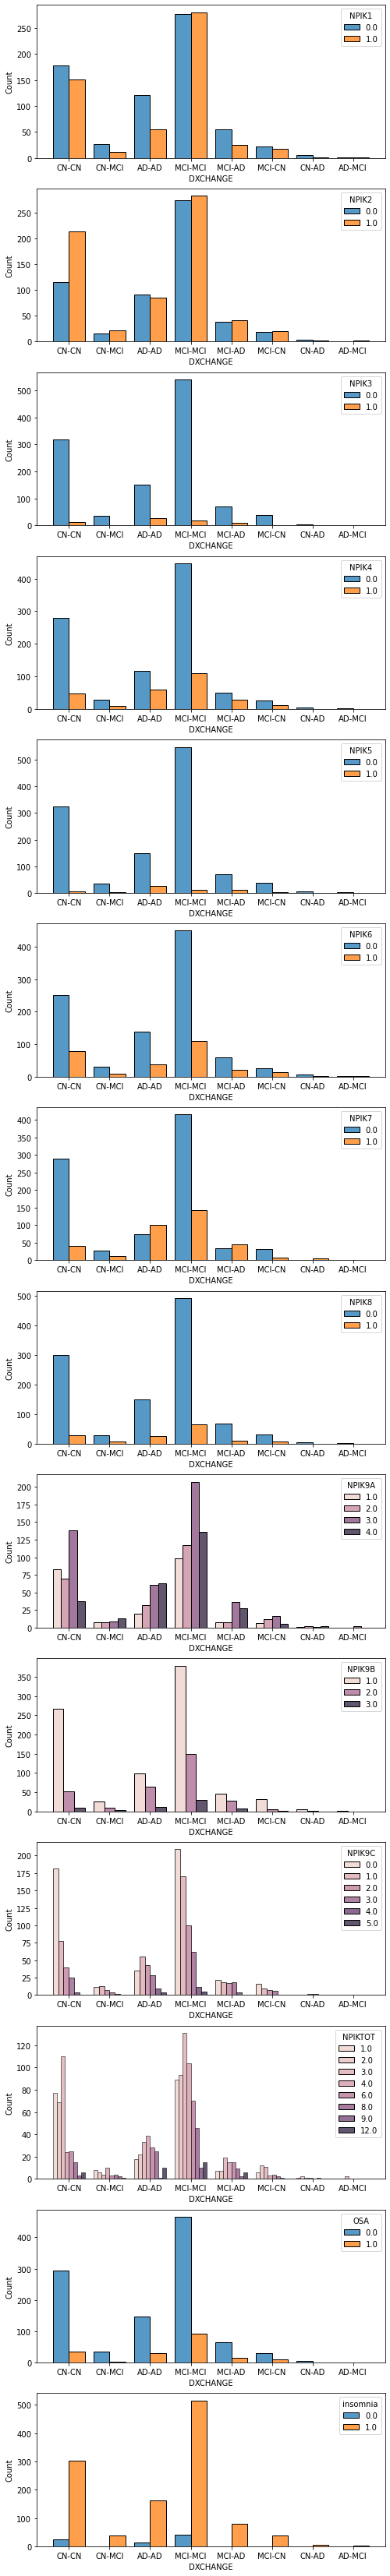

In [21]:
sleep_dxch = sleep.merge(df[com_col + ['DXCHANGE']],how='inner',on=com_col).dropna(subset=['DXCHANGE']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
#sleep_dxch_str = sleep_dxch.copy()
#sleep_dxch_str.iloc[:,3:17] = sleep_dxch_str.iloc[:,3:17].astype('Int64').astype('str')
#sleep_dxch_str.head(2)
lst = ['NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5','NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT',
        'OSA', 'insomnia']   # extract the column names of variables 
f, axes = plt.subplots(len(lst), 1,figsize=(8, 60))
for i in range(len(lst)):
    sns.histplot(data=sleep_dxch, x="DXCHANGE", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

In [22]:
sleep_dxch.groupby('DXCHANGE').count()

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia
DXCHANGE,,,,,,,,,,,,,,,,,
AD-AD,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
AD-MCI,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
CN-AD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
CN-CN,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329
CN-MCI,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
MCI-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
MCI-CN,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
MCI-MCI,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558,558


### The histograms above showed us the relationship between different diagnosis changes to categorical sleep parameters. There are some interesting points:
- insomnia vs DXCHANGE: In the 3 groups without changes, around half of records have insomnia, half not. In other five changes, all records have insomnia.
- 

### Current-Diagnosis vs sleep criteria

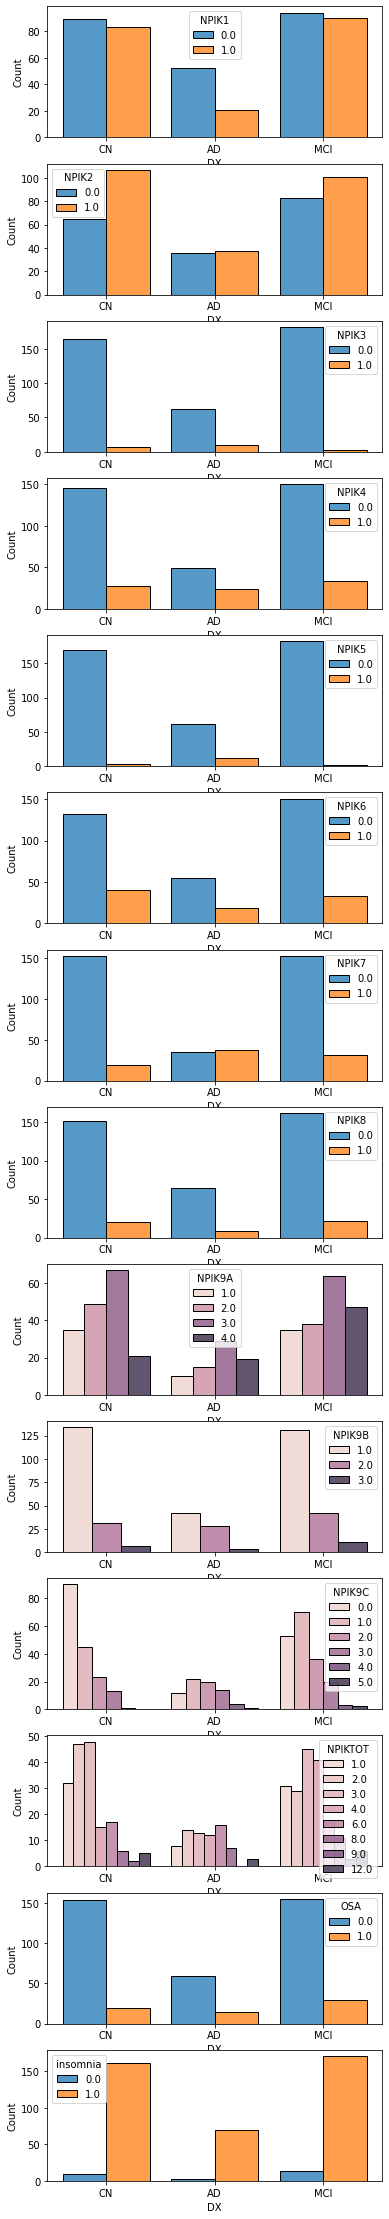

In [23]:
sleep_dx = sleep.merge(df[com_col + ['DX']],how='inner',on=com_col).dropna(subset=['DX']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
f, axes = plt.subplots(len(lst), 1,figsize=(6, 40))
for i in range(len(lst)):
    sns.histplot(data=sleep_dx, x="DX", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

### Diagnosis-baseline vs sleep criteria

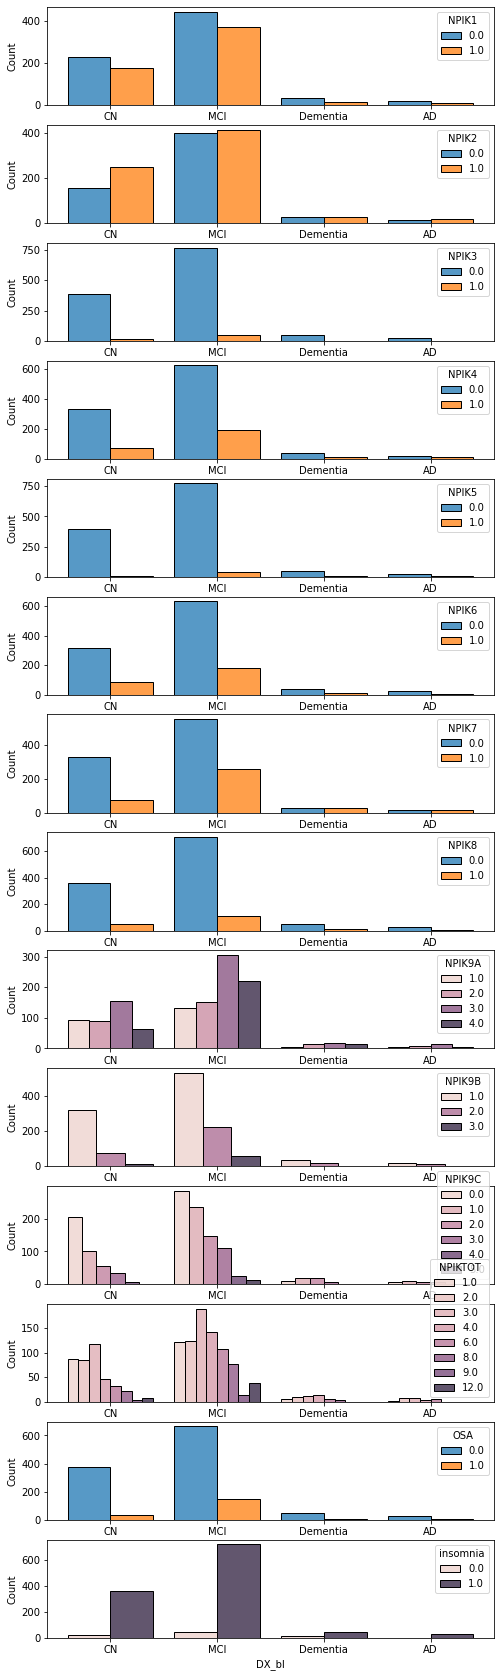

In [24]:
sleep_dxbl = sleep.merge(df[com_col + ['DX_bl']],how='inner',on=com_col).dropna(subset=['DX_bl']).dropna(subset=[ 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8','NPIK9A', 'NPIK9B', 'NPIK9C', 'NPIKTOT'],how='any').dropna(axis=1, how='all')
f, axes = plt.subplots(len(lst), 1,figsize=(8, 30))
for i in range(len(lst)):
    sns.histplot(data=sleep_dxbl, x="DX_bl", hue=lst[i], multiple="dodge", shrink=.8, ax=axes[i])

### total score of NPIK test to DXCHANGE, DX, and DX baseline

<AxesSubplot:xlabel='DX_bl', ylabel='NPIKTOT'>

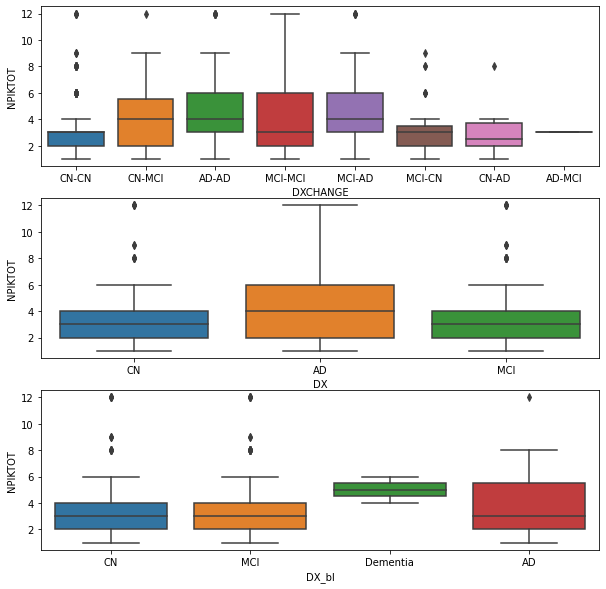

In [25]:
f, axes = plt.subplots(3, 1,figsize=(10, 10))
sns.boxplot(x=sleep_dxch["DXCHANGE"], y=sleep_dxch['NPIKTOT'], orient='v', ax=axes[0])
sns.boxplot(x=sleep_dx["DX"], y=sleep_dx['NPIKTOT'], orient='v', ax=axes[1])
sns.boxplot(x=sleep_dxbl["DX_bl"], y=sleep_dx['NPIKTOT'], orient='v', ax=axes[2])

### logistic regression, diagnosis changes as the target variable.
use dataframe sleep_dxch

In [26]:
train, test = train_test_split(sleep_dxch.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DXCHANGE']
X_test = test[lst]
y_test = test['DXCHANGE']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.458, Test set score: 0.443
lbfgs_L2,C:0.01, Training set score:0.495, Test set score: 0.472
lbfgs_L2,C:0.1, Training set score:0.494, Test set score: 0.459
lbfgs_L2,C:1, Training set score:0.491, Test set score: 0.467
lbfgs_L2,C:10, Training set score:0.493, Test set score: 0.467
lbfgs_L2,C:100, Training set score:0.493, Test set score: 0.467
saga_L1,C:0.001, Training set score:0.457, Test set score: 0.443
saga_L1,C:0.01, Training set score:0.457, Test set score: 0.443
saga_L1,C:0.1, Training set score:0.493, Test set score: 0.459
saga_L1,C:1, Training set score:0.493, Test set score: 0.463
saga_L1,C:10, Training set score:0.493, Test set score: 0.467
saga_L1,C:100, Training set score:0.493, Test set score: 0.467
newton-cg_L2,C:0.001, Training set score:0.458, Test set score: 0.443
newton-cg_L2,C:0.01, Training set score:0.495, Test set score: 0.472
newton-cg_L2,C:0.1, Training set score:0.494, Test set score: 0.459
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (982, 14)
Reduced shape: (982, 4)
explained variance: [2.80690889 1.64291819 1.25211484 1.1205479 ]
explained variance ratio: [0.20028932 0.1172318  0.0893457  0.07995763]
Origianl shape: (982, 14)
Reduced shape: (982, 4)
PCA components: 
[[-0.07788096  0.0500633   0.15441403  0.20701876  0.11518174  0.06713615
   0.22502934  0.09268084  0.39336547  0.48945145  0.39171926  0.5450687
   0.04993451  0.01973053]
 [-0.20972837  0.3055217   0.47940884  0.33768464  0.46137815  0.36944286
  -0.09022823  0.05428701 -0.28805177 -0.0963452   0.09325138 -0.21789199
   0.09753893 -0.02044302]
 [-0.48610564 -0.4319434   0.02828631 -0.02549698  0.15730934 -0.20470797
   0.47649457  0.4265065   0.03481306 -0.21521835 -0.02596632 -0.13524351
   0.13135853  0.12774402]
 [ 0.51837057 -0.43746494  0.1332979   0.14365328  0.15450437 -0.1899472
  -0.27711838  0.46890579 -0.24894042  0.14487141  0.18475105 -0.0252674
  -0.05410907 -0.15567518]]


Text(0, 0.5, 'Principal components')

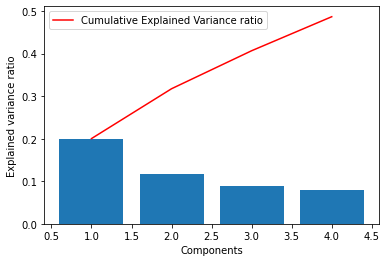

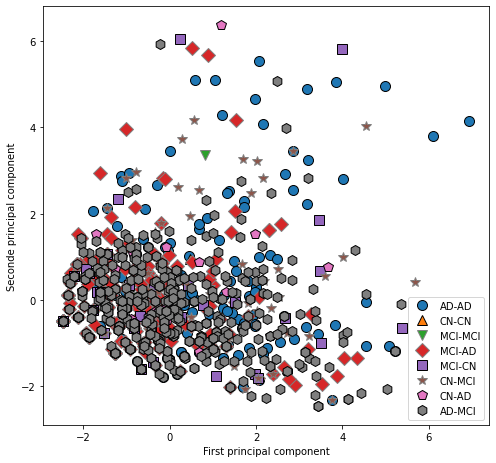

<Figure size 864x864 with 0 Axes>

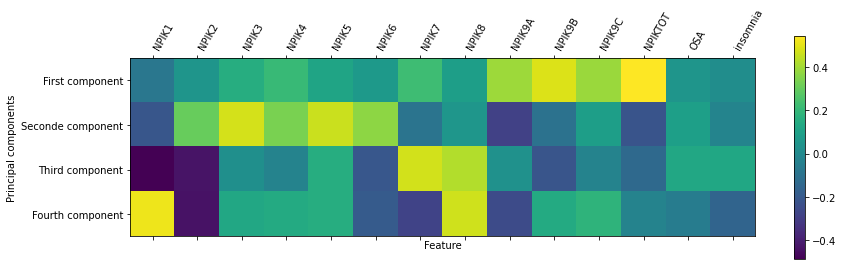

In [27]:
pca = PCA(n_components=4) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DXCHANGE'])
plt.legend(train['DXCHANGE'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [28]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.620, Test set f-score: 0.477
logistic with PCA data. C:0.001, Training set f1-score:0.628, Test set f1-score: 0.614
logistic with PCA data. C:0.01, Training set f1-score:0.588, Test set f1-score: 0.567
logistic with PCA data. C:0.1, Training set f1-score:0.553, Test set f1-score: 0.516
logistic with PCA data. C:1, Training set f1-score:0.551, Test set f1-score: 0.511
logistic with PCA data. C:10, Training set f1-score:0.551, Test set f1-score: 0.514
logistic with PCA data. C:100, Training set f1-score:0.550, Test set f1-score: 0.514
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.628 f1-score on test data: 0.6140845070422536
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.538 f1-score on test data: 0.5249919955953333
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.558 f1-score on test data: 0.5249861092915176
Decision tree with unscaled 

## use dataframe sleep_dx, target_variable 'DX'

In [29]:
sleep_dx

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia,DX
13,ADNI3,72,init,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,CN
15,ADNI3,72,y4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,CN
17,ADNI3,112,init,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,2.0,3.0,8.0,0.0,1.0,AD
25,ADNI3,120,init,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,CN
31,ADNI3,127,init,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,4.0,1.0,1.0,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,ADNI3,7011,bl,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,CN
1325,ADNI3,7039,bl,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,AD
1326,ADNI3,7071,bl,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,MCI
1327,ADNI3,7082,bl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,CN


In [30]:
train, test = train_test_split(sleep_dx.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX']
X_test = test[lst]
y_test = test['DX']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.469, Test set score: 0.407
lbfgs_L2,C:0.01, Training set score:0.557, Test set score: 0.500
lbfgs_L2,C:0.1, Training set score:0.560, Test set score: 0.523
lbfgs_L2,C:1, Training set score:0.560, Test set score: 0.523
lbfgs_L2,C:10, Training set score:0.554, Test set score: 0.523
lbfgs_L2,C:100, Training set score:0.557, Test set score: 0.523
saga_L1,C:0.001, Training set score:0.440, Test set score: 0.384
saga_L1,C:0.01, Training set score:0.440, Test set score: 0.384
saga_L1,C:0.1, Training set score:0.545, Test set score: 0.500
saga_L1,C:1, Training set score:0.554, Test set score: 0.512
saga_L1,C:10, Training set score:0.557, Test set score: 0.512
saga_L1,C:100, Training set score:0.554, Test set score: 0.512
newton-cg_L2,C:0.001, Training set score:0.469, Test set score: 0.407
newton-cg_L2,C:0.01, Training set score:0.557, Test set score: 0.500
newton-cg_L2,C:0.1, Training set score:0.560, Test set score: 0.523
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (343, 14)
Reduced shape: (343, 10)
explained variance: [2.77924761 1.59241215 1.31876052 1.15565468 1.09390586 1.0657291
 0.93551903 0.87594252 0.78235237 0.7234656 ]
explained variance ratio: [0.19793892 0.11341211 0.09392255 0.0823061  0.07790833 0.07590157
 0.06662797 0.06238491 0.05571939 0.05152546]
Origianl shape: (343, 14)
Reduced shape: (343, 4)
PCA components: 
[[-0.01251068  0.10022166  0.15293301  0.21921755  0.07890328  0.14823491
   0.24570671 -0.03021407  0.37217325  0.4914416   0.38648864  0.54559321
   0.02647639  0.03310712]
 [-0.28201476  0.2156835   0.47648127  0.36294201  0.43377399  0.37514883
  -0.01201178  0.02484274 -0.30885697 -0.09213628  0.0552645  -0.226559
   0.10875619 -0.12424275]
 [-0.13527338 -0.54240656  0.11055919  0.09940055  0.20216738 -0.2958608
   0.27192104  0.55384308 -0.05907531 -0.05549398  0.19098183 -0.07552314
  -0.0789773   0.31830688]
 [ 0.7674633  -0.30618844  0.28431995  0.05146344  0.241582   -0.11128246
  -0.19813431 -

Text(0, 0.5, 'Principal components')

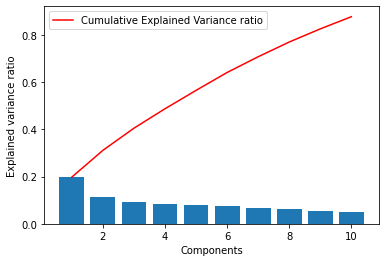

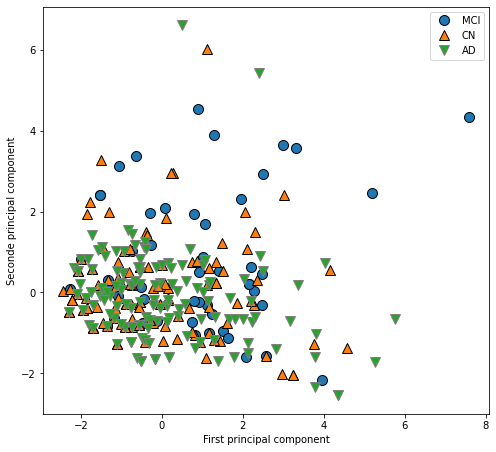

<Figure size 864x864 with 0 Axes>

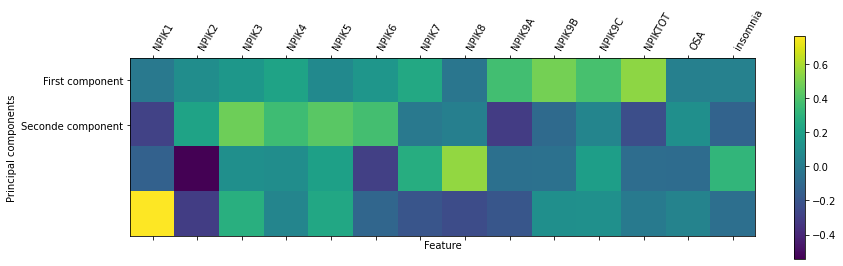

In [31]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX'])
plt.legend(train['DX'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First component','Seconde component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [32]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.659, Test set f-score: 0.473
logistic with PCA data. C:0.001, Training set f1-score:0.569, Test set f1-score: 0.508
logistic with PCA data. C:0.01, Training set f1-score:0.530, Test set f1-score: 0.462
logistic with PCA data. C:0.1, Training set f1-score:0.514, Test set f1-score: 0.469
logistic with PCA data. C:1, Training set f1-score:0.516, Test set f1-score: 0.478
logistic with PCA data. C:10, Training set f1-score:0.512, Test set f1-score: 0.478
logistic with PCA data. C:100, Training set f1-score:0.512, Test set f1-score: 0.478
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.577 f1-score on test data: 0.5100406053894426
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.596 f1-score on test data: 0.5553738913197199
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.611 f1-score on test data: 0.5163597821652209
Decision tree with unscaled 

In [33]:
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,12],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))

MLP with scaled data. f1-score on training data: 0.860 f1-score on test data: 0.486


## use dataframe sleep_dxbl, target_variable 'DX_bl'

In [34]:
sleep_dxbl

,Phase,RID,VISCODE,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,insomnia,DX_bl
0,ADNI2,8,v06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,6.0,0.0,1.0,CN
1,ADNI2,8,v41,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,8.0,0.0,1.0,CN
2,ADNI2,31,v11,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN
3,ADNI2,31,v21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,CN
4,ADNI2,31,v06,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,ADNI3,7011,bl,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,CN
1325,ADNI3,7039,bl,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,3.0,0.0,1.0,AD
1326,ADNI3,7071,bl,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,MCI
1327,ADNI3,7082,bl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,CN


In [35]:
train, test = train_test_split(sleep_dxbl.dropna(axis=0,how='any'),test_size=0.2)    
X_train = train[lst]
y_train = train['DX_bl']
X_test = test[lst]
y_test = test['DX_bl']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled
# logistic regression
C_lst = [0.001,0.01,0.1,1,10,100]
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('lbfgs_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='saga',multi_class='auto',penalty='l1',max_iter=10000).fit(X_train_scaled,y_train)
    print('saga_L1,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))
    
for i in range(len(C_lst)):
    logreg = LogisticRegression(C=C_lst[i],solver='newton-cg',multi_class='auto',penalty='l2',max_iter=10000).fit(X_train_scaled,y_train)
    print('newton-cg_L2,C:{}, Training set score:{:.3f}, Test set score: {:.3f}'.format(C_lst[i],logreg.score(X_train_scaled,y_train),logreg.score(X_test_scaled,y_test)))

lbfgs_L2,C:0.001, Training set score:0.616, Test set score: 0.632
lbfgs_L2,C:0.01, Training set score:0.635, Test set score: 0.644
lbfgs_L2,C:0.1, Training set score:0.635, Test set score: 0.623
lbfgs_L2,C:1, Training set score:0.635, Test set score: 0.628
lbfgs_L2,C:10, Training set score:0.634, Test set score: 0.628
lbfgs_L2,C:100, Training set score:0.631, Test set score: 0.628
saga_L1,C:0.001, Training set score:0.616, Test set score: 0.632
saga_L1,C:0.01, Training set score:0.616, Test set score: 0.632
saga_L1,C:0.1, Training set score:0.637, Test set score: 0.652
saga_L1,C:1, Training set score:0.636, Test set score: 0.628
saga_L1,C:10, Training set score:0.635, Test set score: 0.628
saga_L1,C:100, Training set score:0.631, Test set score: 0.628
newton-cg_L2,C:0.001, Training set score:0.616, Test set score: 0.632
newton-cg_L2,C:0.01, Training set score:0.635, Test set score: 0.644
newton-cg_L2,C:0.1, Training set score:0.635, Test set score: 0.623
newton-cg_L2,C:1, Training set 

#### after trying different solvers for multi_class labels: 'saga','lbfgs','sag','newton-cg' with possible penalty ('l2' or 'l1'), all logistic models work not that good on our data.  

### PCA 

Origianl shape: (988, 14)
Reduced shape: (988, 10)
explained variance: [2.86762203 1.5935882  1.24595977 1.09984312 1.07719193 1.00122572
 0.94975707 0.92515993 0.82072286 0.70115386]
explained variance ratio: [0.20462283 0.11371252 0.08890705 0.07848071 0.0768644  0.07144374
 0.06777113 0.06601597 0.05856373 0.05003173]
Origianl shape: (988, 14)
Reduced shape: (988, 4)
PCA components: 
[[-0.09372871  0.02716952  0.16874161  0.19864844  0.12060766  0.04335642
   0.23078953  0.10486902  0.39219719  0.48066873  0.39590319  0.54016816
   0.06286739  0.06723207]
 [-0.08595649  0.35412187  0.4711509   0.30662088  0.45550578  0.40644274
  -0.21251697 -0.04563925 -0.29204497 -0.02046418  0.07880555 -0.16477073
   0.10838664 -0.02157788]
 [-0.56711697 -0.34070433  0.1569566   0.10351176  0.19484647 -0.13669736
   0.43327978  0.3894898  -0.02792399 -0.26067779 -0.03588293 -0.20249884
   0.0172009   0.13979254]
 [ 0.48957742 -0.45965239  0.13674749  0.01239464  0.28483824 -0.15641894
  -0.304075

Text(0, 0.5, 'Principal components')

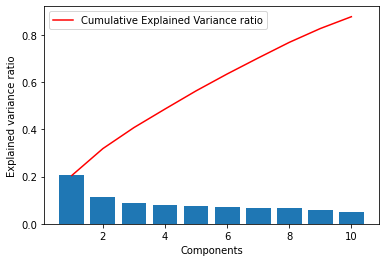

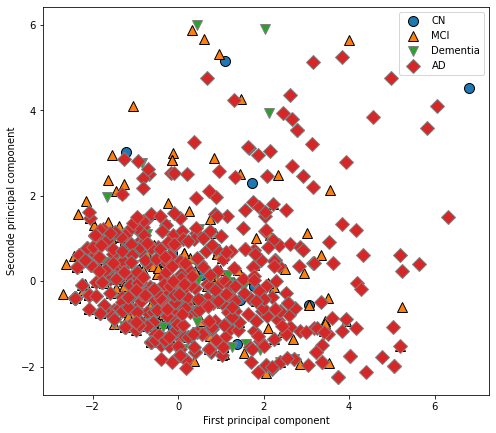

<Figure size 864x864 with 0 Axes>

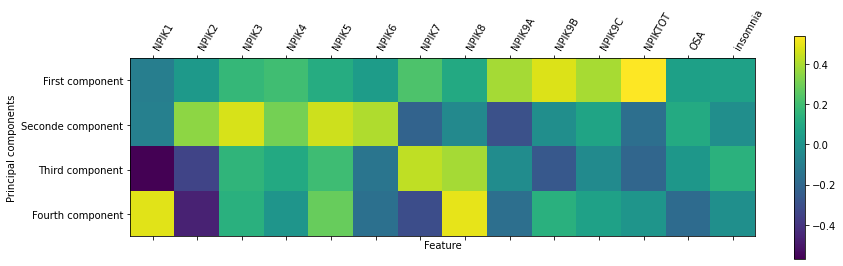

In [36]:
pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX_bl'])
plt.legend(train['DX_bl'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')


In [37]:
# knn
X_test_pca = pca.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=4)    
knn.fit(X_pca,y_train)
print('knn model with PCA data. Training set f1-score:{:.3f}, Test set f-score: {:.3f}'.format(f1_score(knn.predict(X_pca),y_train,average='weighted'),f1_score(knn.predict(X_test_pca),y_test,average='weighted')))

# logistic regression on pca data
for i in range(len(C_lst)):     
    logreg = LogisticRegression(C=C_lst[i],solver='lbfgs',multi_class='auto',penalty='l2',max_iter=100000).fit(X_pca,y_train)
    print('logistic with PCA data. C:{}, Training set f1-score:{:.3f}, Test set f1-score: {:.3f}'.format(C_lst[i],f1_score(logreg.predict(X_pca),y_train,average='weighted'),f1_score(logreg.predict(X_test_pca),y_test,average='weighted')))
    
# decision tree
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_train,y_train)
    print('Decision tree with unscaled data. tree depth: {:.3f}. f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_train),y_train,average='weighted'),f1_score(tree.predict(X_test),y_test,average='weighted')))
    
# decision tree with PCA data 
for i in range(1,14):
    tree = DecisionTreeClassifier(random_state=0,max_depth=i)
    tree.fit(X_pca,y_train)
    print('Decision tree with PCA data. tree depth: {:.3f} f1-score on training data: {:.3f} f1-score on test data: {}'.format(i,f1_score(tree.predict(X_pca),y_train,average='weighted'),f1_score(tree.predict(X_test_pca),y_test,average='weighted')))
    
# MLP with scaled data
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [8,10],max_iter=10000).fit(X_train_scaled,y_train)
mlp.fit(X_train_scaled,y_train)
print('MLP with scaled data. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_train_scaled),y_train,average='weighted'),f1_score(mlp.predict(X_test_scaled),y_test,average='weighted')))
    
    
# MLP with PCA 
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes = [18,10,5],max_iter=20000).fit(X_pca,y_train)
mlp.fit(X_pca,y_train)
print('MLP with PCA. f1-score on training data: {:.3f} f1-score on test data: {:.3f}'.format(f1_score(mlp.predict(X_pca),y_train,average='weighted'),f1_score(mlp.predict(X_test_pca),y_test,average='weighted')))    
    

knn model with PCA data. Training set f1-score:0.687, Test set f-score: 0.583
logistic with PCA data. C:0.001, Training set f1-score:0.763, Test set f1-score: 0.774
logistic with PCA data. C:0.01, Training set f1-score:0.760, Test set f1-score: 0.774
logistic with PCA data. C:0.1, Training set f1-score:0.754, Test set f1-score: 0.768
logistic with PCA data. C:1, Training set f1-score:0.754, Test set f1-score: 0.768
logistic with PCA data. C:10, Training set f1-score:0.754, Test set f1-score: 0.768
logistic with PCA data. C:100, Training set f1-score:0.754, Test set f1-score: 0.768
Decision tree with unscaled data. tree depth: 1.000. f1-score on training data: 0.763 f1-score on test data: 0.7741935483870968
Decision tree with unscaled data. tree depth: 2.000. f1-score on training data: 0.763 f1-score on test data: 0.7741935483870968
Decision tree with unscaled data. tree depth: 3.000. f1-score on training data: 0.648 f1-score on test data: 0.6554431790700115
Decision tree with unscaled 

In [38]:
neubat

NameError: name 'neubat' is not defined

In [ ]:
neubat.shape

In [ ]:
neubat = pd.read_csv('neurobat_short.csv',sep=';').iloc[:,1:]
neubat = neubat.dropna(subset=neubat.columns[3:],how='all')
sleep_neubat = sleep.merge(neubat,how='inner',on=com_col)
sleep_neubat

In [ ]:
# split dataset
train, test = train_test_split(sleep_neubat.iloc[:,3:],test_size=0.2)    
X_train = train.copy()
#y_train = train['DX']
X_test = test.copy()
#y_test = test['DX']
## data scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled,X_test_scaled

pca = PCA(n_components=10) #keep the first two principal components of the data
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# Explained variance is the amount of variance explained by each of the selected components.
print("explained variance: {}".format(pca.explained_variance_))
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))

plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance ratio")
plt.legend(loc='upper left')

# The component 1 can explain about 20% of the variance, conponent 2 can explain about 11.7%,... 
# It needs almost 10 principal components to explain at least 90% of the variance. 
pca = PCA(n_components=4) 
pca.fit(X_train_scaled) # fit PCA model to sleep-diagnosis_change data
X_pca = pca.transform(X_train_scaled)  #transform data onto the first two principal components
print("Origianl shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
# plot
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],train['DX_bl'])
plt.legend(train['DX_bl'].unique(),loc='best')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel('Seconde principal component')

print('PCA components: \n{}'.format(pca.components_))    # PCA components
plt.figure(figsize=(12,12))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['First component','Seconde component','Third component','Fourth component'])
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')
